In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Bird Strikes data.csv")
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,2,ALASKA AIRLINES,Washington,Climb,None,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,None,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [5]:
data.isna().sum()

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [6]:
data.shape

(25558, 26)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(20142, 26)

In [9]:
data

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,2,ALASKA AIRLINES,Washington,Climb,None,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,None,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25551,319671,Airplane,BELLINGHAM INTL,< 1000 ft,MD-83,1,1,None,12/29/11 0:00,No damage,2,ALLEGIANT AIR,Washington,Climb,None,False,False,NO DMG TO A/C. POSSIBLY GULL?,Small,Some Cloud,Unknown bird - small,N,0,50,0,No
25552,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,None,12/29/11 0:00,No damage,2,SOUTHWEST AIRLINES,California,Approach,None,True,True,ID BY SMITHSONIAN. SAMPLES FROM BOTH A/C AND B...,Medium,No Cloud,Mallard,Y,0,10,0,Yes
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,None,12/30/11 0:00,No damage,2,SKYWEST AIRLINES,California,Approach,Fog,False,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,None,12/31/11 0:00,No damage,2,DELTA AIR LINES,Michigan,Landing Roll,None,False,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [10]:
data['Wildlife: Number Struck Actual'].sum()

57646

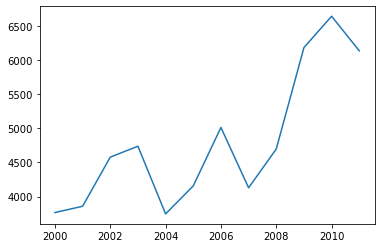

In [11]:
data['year'] = pd.to_datetime(data['FlightDate']).dt.year
plt.plot(data.groupby(['year'])['Wildlife: Number Struck Actual'].sum())

In [44]:
#Top 10 Airlines with most number of BirdStrike
df = data.groupby(['Aircraft: Airline/Operator'])['Wildlife: Number Struck Actual'].sum().reset_index()
df = df.sort_values(['Wildlife: Number Struck Actual'],ascending=False)
df = df.head(10)
df

,Aircraft: Airline/Operator,Wildlife: Number Struck Actual
234,SOUTHWEST AIRLINES,7884
64,BUSINESS,7626
43,AMERICAN AIRLINES,4589
106,DELTA AIR LINES,3414
257,US AIRWAYS*,2843
44,AMERICAN EAGLE AIRLINES,2418
252,UNITED AIRLINES,1861
94,COMAIR AIRLINES,1771
230,SKYWEST AIRLINES,1706
33,ALASKA AIRLINES,1473


<BarContainer object of 10 artists>

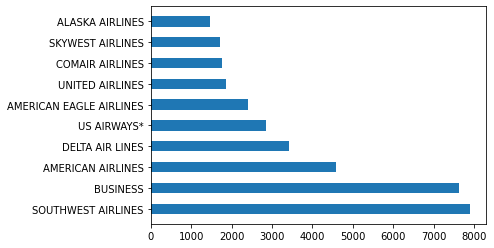

In [45]:
plt.barh(df['Aircraft: Airline/Operator'],df['Wildlife: Number Struck Actual'],height = 0.5)

In [34]:
#Top 50 Airports with most number of BirdStrike
df = data.groupby(['Airport: Name'])['Wildlife: Number Struck Actual'].sum().reset_index()
df = df.sort_values(['Wildlife: Number Struck Actual'],ascending=False)
df = df.head(50)
df

,Airport: Name,Wildlife: Number Struck Actual
174,DALLAS/FORT WORTH INTL ARPT,2703
735,SACRAMENTO INTL,1745
439,LAGUARDIA NY,1539
742,SALT LAKE CITY INTL,1311
658,PHILADELPHIA INTL,1252
762,SEATTLE-TACOMA INTL,1172
396,JOHN F KENNEDY INTL,1163
746,SAN FRANCISCO INTL ARPT,1145
594,NORFOLK INTL,1094
474,LOGAN INTL,932


<BarContainer object of 50 artists>

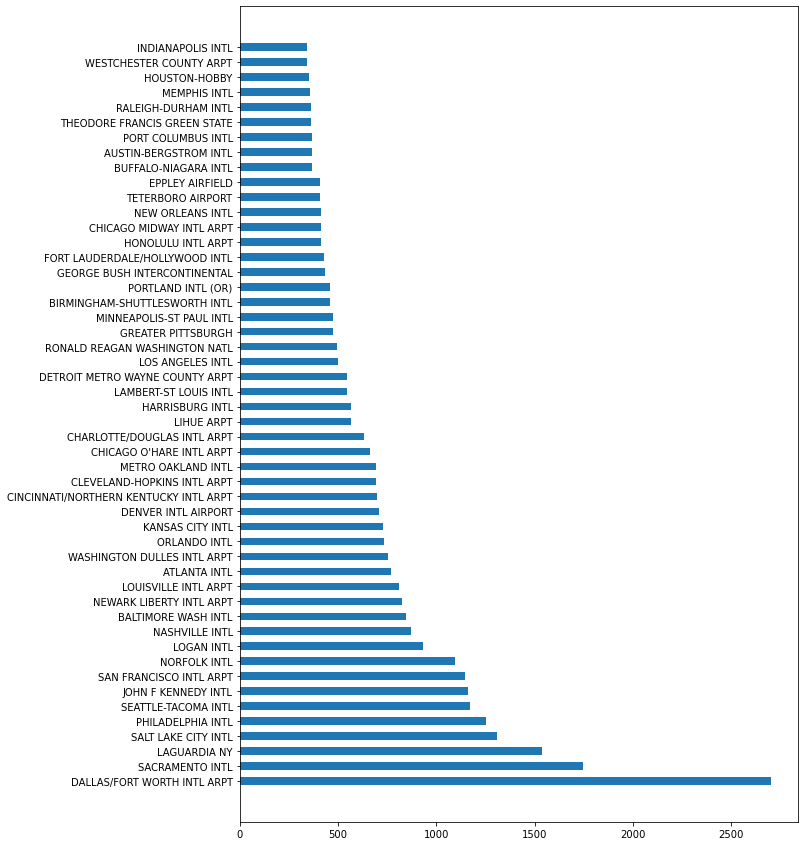

In [41]:
plt.figure(figsize = (10,15))
plt.barh(df['Airport: Name'],df['Wildlife: Number Struck Actual'], height=0.5,align = 'center')


In [16]:
data['Cost: Total $']=data['Cost: Total $'].str.replace(',','').astype(int).astype(float)

In [17]:
data.describe()

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Number of people injured,year
count,20142.000000,20142.000000,2.014200e+04,20142.000000,20142.000000
mean,255993.710605,2.861980,6.629305e+03,0.001043,2006.662298
std,35594.083484,13.558744,1.360561e+05,0.053188,3.315367
min,200011.000000,1.000000,0.000000e+00,0.000000,2000.000000
25%,227283.250000,1.000000,0.000000e+00,0.000000,2004.000000
50%,250426.500000,1.000000,0.000000e+00,0.000000,2007.000000
75%,270159.750000,1.000000,0.000000e+00,0.000000,2009.000000
max,321909.000000,942.000000,1.239775e+07,6.000000,2011.000000


In [18]:
#Yearly Total Cost Incurred by BirdStrike
df = data.groupby(['year'])['Cost: Total $'].sum().reset_index()
df.sort_values(['Cost: Total $'],ascending=False)

,year,Cost: Total $
1,2001,21860525.0
6,2006,18219546.0
11,2011,12988653.0
8,2008,11798679.0
3,2003,11675380.0
10,2010,10659316.0
9,2009,9168990.0
2,2002,8919504.0
7,2007,8632918.0
4,2004,8077434.0


<module 'matplotlib.pyplot' from 'C:\\Users\\SHIVAM\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

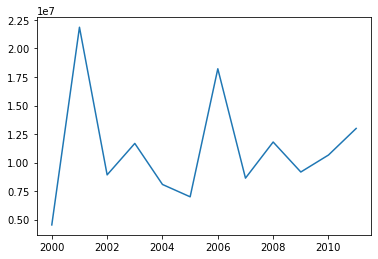

In [19]:
plt.plot(df['year'],df['Cost: Total $'])
plt

In [20]:
#Conditions when BirdStrike occurs
df = data.groupby(['Conditions: Sky','Conditions: Precipitation'])['Wildlife: Number Struck Actual'].sum().reset_index()
df.sort_values(['Wildlife: Number Struck Actual'],ascending=False)

,Conditions: Sky,Conditions: Precipitation,Wildlife: Number Struck Actual
1,No Cloud,None,26038
14,Some Cloud,None,18376
8,Overcast,None,6933
9,Overcast,Rain,3393
4,Overcast,Fog,1167
15,Some Cloud,Rain,598
11,Overcast,Snow,341
5,Overcast,"Fog, Rain",306
12,Some Cloud,Fog,219
0,No Cloud,Fog,210


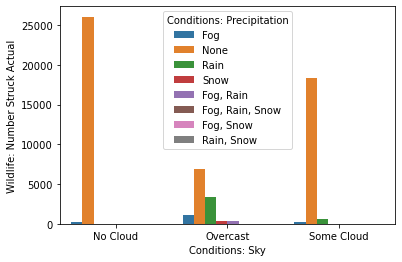

In [21]:
sns.barplot(x='Conditions: Sky', y='Wildlife: Number Struck Actual', hue='Conditions: Precipitation', data=df)
plt.xlabel('Conditions: Sky')
plt.ylabel('Wildlife: Number Struck Actual')
plt.show()


In [22]:
#Altitude of Airplanes with most number of BirdStrike
df = data.groupby(['Altitude bin'])['Wildlife: Number Struck Actual'].sum().reset_index()
df = df.sort_values(['Wildlife: Number Struck Actual'],ascending=False)
df

,Altitude bin,Wildlife: Number Struck Actual
0,< 1000 ft,50392
1,> 1000 ft,7254


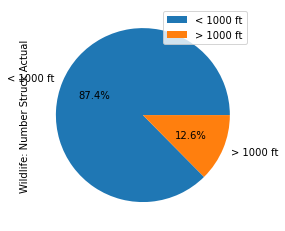

In [23]:
df.plot(kind='pie', y='Wildlife: Number Struck Actual', autopct='%1.1f%%',labels = df['Altitude bin'])
plt.show()

In [47]:
#Phase of Flight with most number of BirdStrike
df = data.groupby(['When: Phase of flight'])['Wildlife: Number Struck Actual'].sum().reset_index()
df = df.sort_values(['Wildlife: Number Struck Actual'],ascending=False)
df

,When: Phase of flight,Wildlife: Number Struck Actual
0,Approach,20818
3,Landing Roll,12164
5,Take-off run,11944
1,Climb,11545
2,Descent,978
6,Taxi,185
4,Parked,12


C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


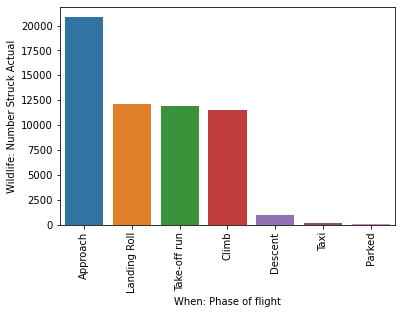

In [48]:
sns.barplot(df['When: Phase of flight'],df['Wildlife: Number Struck Actual'])
plt.xticks(rotation = 90)
plt.show()

In [50]:
#Phase of Flight with Avg Altitude
data['Feet above ground'] = data['Feet above ground'].str.replace(',','').astype(int).astype(float)
df = data.groupby(['When: Phase of flight'])['Feet above ground'].mean().reset_index()
df

,When: Phase of flight,Feet above ground
0,Approach,1003.950401
1,Climb,1181.376959
2,Descent,5892.640575
3,Landing Roll,0.000000
4,Parked,0.000000
5,Take-off run,0.000000
6,Taxi,0.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

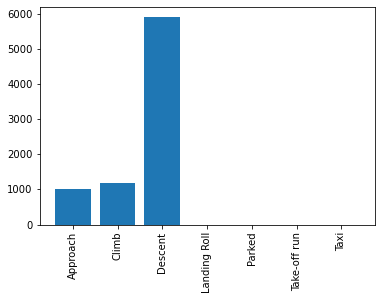

In [51]:
plt.bar(df['When: Phase of flight'],df['Feet above ground'])
plt.xticks(rotation = 90)

In [28]:
#Effect of Bird Strike and Impact of Flight
df = data.groupby(['Effect: Impact to flight','Effect: Indicated Damage'])['Wildlife: Number Struck Actual'].sum().reset_index()
df

,Effect: Impact to flight,Effect: Indicated Damage,Wildlife: Number Struck Actual
0,Aborted Take-off,Caused damage,897
1,Aborted Take-off,No damage,1135
2,Engine Shut Down,Caused damage,1404
3,Engine Shut Down,No damage,8
4,None,Caused damage,5013
5,None,No damage,41213
6,Other,Caused damage,806
7,Other,No damage,1017
8,Precautionary Landing,Caused damage,2690
9,Precautionary Landing,No damage,3463


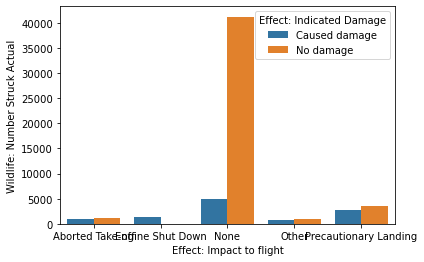

In [29]:
sns.barplot(x='Effect: Impact to flight', y='Wildlife: Number Struck Actual', hue='Effect: Indicated Damage', data=df)
plt.xlabel('Effect: Impact to flight')
plt.ylabel('Wildlife: Number Struck Actual')
plt.show()

In [30]:
#Effect of Bird Strike at different altitude
df = data.groupby(['Effect: Indicated Damage','Altitude bin'])['Wildlife: Number Struck Actual'].sum().reset_index()
df


,Effect: Indicated Damage,Altitude bin,Wildlife: Number Struck Actual
0,Caused damage,< 1000 ft,8306
1,Caused damage,> 1000 ft,2504
2,No damage,< 1000 ft,42086
3,No damage,> 1000 ft,4750


In [31]:
#Were Pilots were informed
df = data.groupby(['Pilot warned of birds or wildlife?'])['Wildlife: Number Struck Actual'].sum().reset_index()
df


,Pilot warned of birds or wildlife?,Wildlife: Number Struck Actual
0,N,29312
1,Y,28334


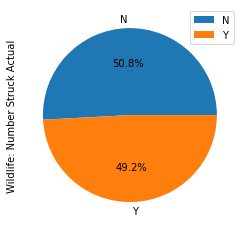

In [32]:
df.plot(kind='pie', y='Wildlife: Number Struck Actual', autopct='%1.1f%%',labels = df['Pilot warned of birds or wildlife?'])
plt.show()